In [27]:
import pymysql
import pandas as pd
import matplotlib.pyplot as plt
import utils 
import numpy as np

In [28]:

font_path = r'C:\WINDOWS\Fonts\malgun.ttf' # 한글 폰트 깨짐 방지
utils.set_Koreantxt(font_path)

[폰트 설정] 
Malgun Gothic


In [29]:
conn = pymysql.connect(host='172.20.181.194', user='Oh', password='1234',
db='team5', charset='utf8')

query = """select pct.year, pct.전체_변화율, pct.관광호텔업_변화율, pct.기타호텔업_변화율, pct.휴양콘도미니엄업_변화율,c.호텔숙박료,c.여관숙박료, c.콘도이용료,c.휴양시설이용료,com.소매판매액지수_증감률, com.경제성장률 
from (select T1.year, ((T1.전체 - T2.전체) / T2.전체) * 100 AS 전체_변화율, ((T1.관광호텔업 - T2.관광호텔업) / T2.관광호텔업) * 100 AS 관광호텔업_변화율, 
((T1.기타호텔업 - T2.기타호텔업) / T2.기타호텔업) * 100 AS 기타호텔업_변화율, ((T1.휴양콘도미니엄업 - T2.휴양콘도미니엄업) / T2.휴양콘도미니엄업) * 100 AS 휴양콘도미니엄업_변화율 
from ys_accommodation_revenue as T1 inner join ys_accommodation_revenue as T2 on T1.year - 1 = T2.year order by T1.year) as pct
inner join cpi as c on pct.year = c.year
inner join common as com on pct.year = com.year
where c.year between 2014 and 2023 
and com.year between 2014 and 2023"""

cur = conn.cursor()
cur.execute(query)

rows = cur.fetchall() # 모든 데이터를 가져옴


accommodation_revenue_df = pd.DataFrame(rows ,columns = ['year','전체_변화율','관광호텔업_변화율','기타호텔업_변화율','휴양콘도미니엄업_변화율','cpi_호텔숙박료','cpi_여관숙박료','cpi_콘도이용료','cpi_휴양시설이용료','csi_common', 'growth'])


cur.close()
conn.close()

In [30]:
accommodation_revenue_df=accommodation_revenue_df.set_index('year')

C:\Users\KDP-48\AppData\Local\Temp\ipykernel_14928\1600164300.py:12: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  plt.savefig("graph.png", dpi=300, transparent=True)
c:\Users\KDP-48\anaconda3\envs\bigdata\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


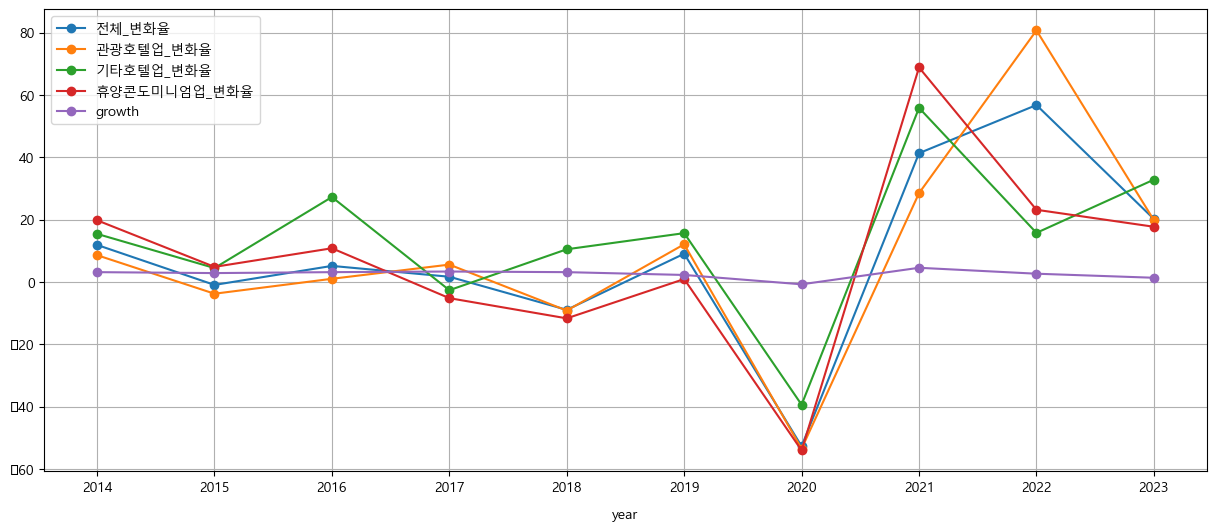

In [31]:
# 변화율 동향
plt.figure(figsize=(15,6))

# 각 컬럼을 개별적으로 plot
for col in ['전체_변화율', '관광호텔업_변화율', '기타호텔업_변화율', '휴양콘도미니엄업_변화율','growth']:
    plt.plot(accommodation_revenue_df.index, accommodation_revenue_df[col], marker='o', label=col)

plt.xticks(accommodation_revenue_df.index)
plt.xlabel('year', fontsize=10, labelpad=10)
plt.legend()
plt.grid()
plt.savefig("graph.png", dpi=300, transparent=True)
plt.show()


In [32]:
correlation = accommodation_revenue_df.corr()
correlation

,전체_변화율,관광호텔업_변화율,기타호텔업_변화율,휴양콘도미니엄업_변화율,cpi_호텔숙박료,cpi_여관숙박료,cpi_콘도이용료,cpi_휴양시설이용료,csi_common,growth
전체_변화율,1.000000,0.964042,0.790739,0.871004,0.274933,0.100826,0.165092,0.387794,0.058698,0.637097
관광호텔업_변화율,0.964042,1.000000,0.618521,0.711025,0.362263,0.165877,0.214193,0.399895,-0.112921,0.502471
기타호텔업_변화율,0.790739,0.618521,1.000000,0.930781,0.184742,0.084982,0.144468,0.213511,0.388483,0.717400
휴양콘도미니엄업_변화율,0.871004,0.711025,0.930781,1.000000,0.000462,-0.098734,0.009641,0.302608,0.375986,0.765717
cpi_호텔숙박료,0.274933,0.362263,0.184742,0.000462,1.000000,0.860402,0.641651,0.271941,-0.542632,-0.143500
cpi_여관숙박료,0.100826,0.165877,0.084982,-0.098734,0.860402,1.000000,0.352683,0.230963,-0.625285,-0.295094
cpi_콘도이용료,0.165092,0.214193,0.144468,0.009641,0.641651,0.352683,1.000000,0.540471,-0.426379,-0.366553
cpi_휴양시설이용료,0.387794,0.399895,0.213511,0.302608,0.271941,0.230963,0.540471,1.000000,-0.614026,-0.290560
csi_common,0.058698,-0.112921,0.388483,0.375986,-0.542632,-0.625285,-0.426379,-0.614026,1.000000,0.718310
growth,0.637097,0.502471,0.717400,0.765717,-0.143500,-0.295094,-0.366553,-0.290560,0.718310,1.000000


C:\Users\KDP-48\AppData\Local\Temp\ipykernel_14928\881557813.py:24: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Malgun Gothic.
  plt.savefig("graph.png", dpi=300, transparent=True)


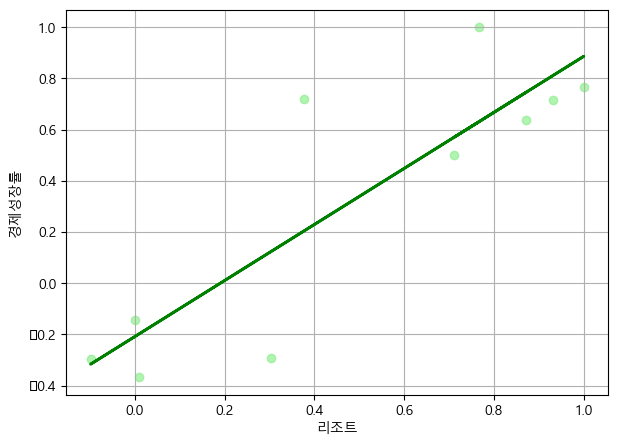

In [35]:
xData = correlation["휴양콘도미니엄업_변화율"]
yData1 = correlation["growth"]




# 산점도 그리기
plt.figure(figsize=(7, 5))
plt.scatter(xData, yData1, alpha=0.7, color="lightgreen")

slope, intercept = np.polyfit(xData, yData1, 1)  # 1차 다항식(직선) 피팅
trend_line = slope * xData + intercept  # 회귀선 방정식

# 추세선 추가
plt.plot(xData, trend_line, color="green", linewidth=2, linestyle="solid", label="Trend Line")

# 제목 및 라벨 설정

plt.xlabel("리조트")
plt.ylabel("경제성장률")
plt.grid()

# 그래프 출력
plt.savefig("graph.png", dpi=300, transparent=True)
plt.show()



1. 숙박업과 소비 판매액 지수(CSI)의 관계  
- csi_common vs 기타호텔업_변화율 = 0.38
  → 소비 판매액 지수와 숙박업 변화율 간의 관계는 약함.  
  → 즉, 소비 규모가 증가해도 숙박업 매출이 크게 오르지는 않음.  

경기 회복으로 소비가 증가해도 숙박업에 미치는 영향은 제한적일 수 있음.  
즉, 숙박업은 경기와 직접적인 영향을 받기보다는 여행 수요, 정책 변화, 특정 이벤트(예: 올림픽, 축제) 등 외부 요인에 더 민감할 가능성이 큼.  

---

2. 숙박업과 경제 성장률(GDP)과의 관계  
- growth vs 전체_변화율 = 0.63
  → 경제 성장률이 높아질수록 숙박업 변화율도 상승하는 경향.  
  → 하지만 완전히 동반 상승하는 것은 아니며, 일정 부분은 독립적으로 움직일 가능성이 있음.  

- growth vs 휴양콘도미니엄업_변화율 = 0.76  
  → 경제 성장률이 높아질수록 휴양 콘도미니엄업의 매출이 증가.  
  → 즉, 경기 회복 시 여행 및 장기 숙박 시설에 대한 수요 증가 가능성.  


숙박업은 경제 성장과 일정 부분 관련이 있지만, 특히 휴양 콘도미니엄(레저형 숙박업)이 경제 성장의 영향을 많이 받음.  
즉, 경제가 성장할수록 여가형 숙박 시설 수요가 증가하는 경향이 있음.  




---
소비 판매액 지수(CSI)와 숙박업 변화율 간의 관계는 약함 → 소비 증가가 숙박업 매출 증가로 직결되지 않음. -> 사치재 맞음

경제 성장률(GDP)이 증가할수록 숙박업 매출도 상승하지만, 특히 휴양 콘도미니엄업과의 관계가 가장 강함.  



<hr>